# RESTAURANT RATING PREDICTION

### IMPORTING LIBRARIES

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zom_rest_df = pd.read_csv('zomato.csv')
zom_rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zom_rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
zom_rest_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
zom_rest_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
zom_rest_df.shape

(51717, 17)

SEARCHING FOR DUPLICATED VALUES

In [8]:
zom_rest_df.drop(columns=['url', 'address','phone','reviews_list', 'menu_item'],inplace=True)

In [9]:
zom_rest_df.duplicated().sum()

108

In [10]:
zom_rest_df.drop_duplicates(inplace=True)

In [11]:
zom_rest_df.dropna(how='any', inplace=True)

In [12]:
zom_rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23364 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23364 non-null  object
 1   online_order                 23364 non-null  object
 2   book_table                   23364 non-null  object
 3   rate                         23364 non-null  object
 4   votes                        23364 non-null  int64 
 5   location                     23364 non-null  object
 6   rest_type                    23364 non-null  object
 7   dish_liked                   23364 non-null  object
 8   cuisines                     23364 non-null  object
 9   approx_cost(for two people)  23364 non-null  object
 10  listed_in(type)              23364 non-null  object
 11  listed_in(city)              23364 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.3+ MB


In [13]:
# renaming the columns 
zom_rest_df =zom_rest_df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)': 'type', 'listed_in(city)':'city'})
zom_rest_df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [14]:
# Removing /5 in dataframe column 'rate'
zom_rest_df['rate']=zom_rest_df['rate'].str.replace('/5','')
zom_rest_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [15]:
# drop rows containing 'NEW' in the 'rate' column
zom_rest_df = zom_rest_df[~zom_rest_df['rate'].astype(str).str.contains('NEW')]

In [16]:
zom_rest_df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [17]:
zom_rest_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


### EXPLORATORY DATA ANALYSIS

In [18]:
# Count the number of unique restaurants
unique_restaurants = len(zom_rest_df["name"].unique())

print("Number of unique restaurants:", unique_restaurants)


Number of unique restaurants: 3157


In [19]:
# Top 10 restauraunts 
top_10 = zom_rest_df['name'].value_counts(ascending=False)[:10]
top_10

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Burger King               51
Corner House Ice Cream    51
Name: name, dtype: int64

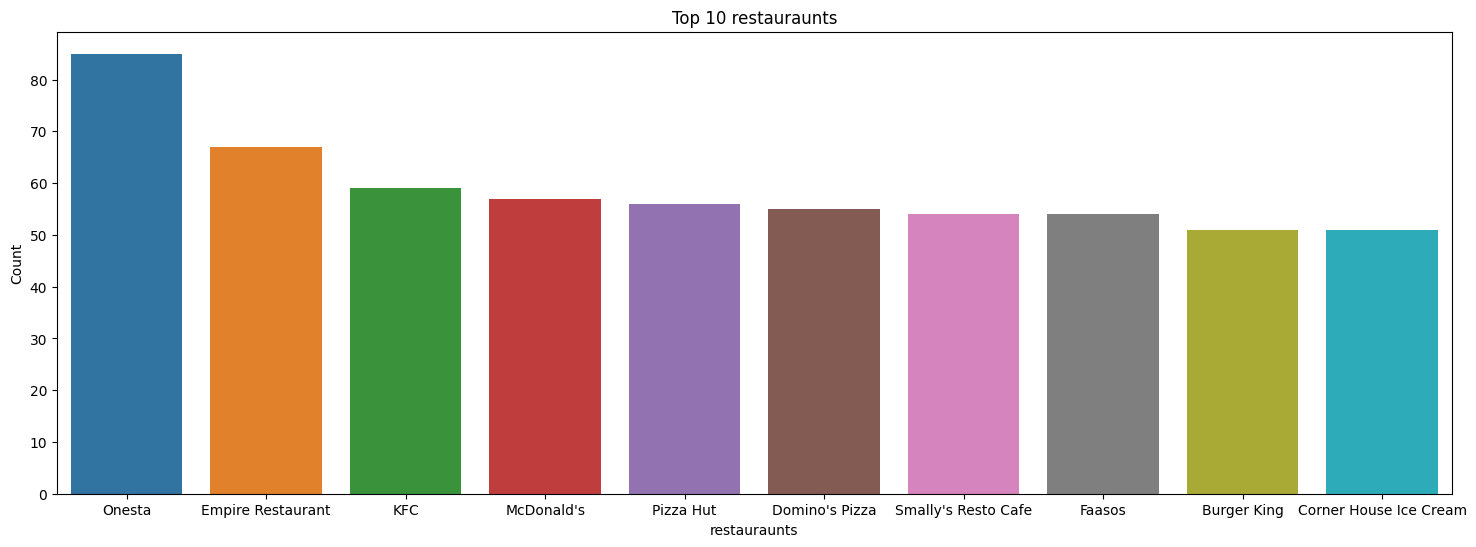

In [20]:
# Get the top 10 restauraunts based on their counts
restauraunt = zom_rest_df['name'].value_counts()[:10]

# Plot the bar plot using Seaborn
plt.figure(figsize=(18, 6))  # Set the size of the plot
sns.barplot(x=restauraunt.index,y=restauraunt.values)

# Set the plot title and axis labels
plt.title('Top 10 restauraunts')
plt.xlabel('restauraunts')
plt.ylabel('Count')
plt.show()

In [21]:
# Group restaurants by location and cuisine, and count the number of restaurants for each combination
df_cuisines = zom_rest_df.groupby(['location', 'cuisines']).size().reset_index(name='count')

# Sort the cuisines by count in descending order, and select the top cuisine for each location
data_cuisines_loc = df_cuisines.sort_values('count', ascending=False).groupby('location').head(1).reset_index(drop=True)


data_cuisines_loc.head(10)

,location,cuisines,count
0,BTM,North Indian,86
1,Koramangala 7th Block,North Indian,81
2,Whitefield,North Indian,72
3,JP Nagar,North Indian,64
4,HSR,North Indian,62
5,Marathahalli,"North Indian, Chinese",60
6,Bellandur,North Indian,59
7,Indiranagar,North Indian,58
8,Bannerghatta Road,"North Indian, Chinese",58
9,Koramangala 1st Block,North Indian,55


### MOST FAVOURED CUISINE

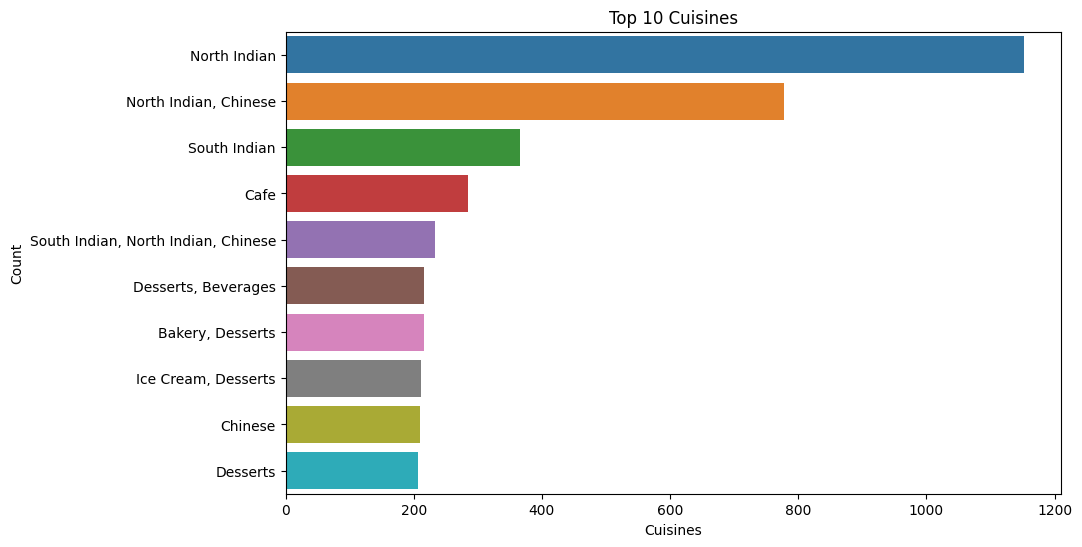

In [22]:

# Get the top 10 cuisines based on their counts
cuisines = zom_rest_df['cuisines'].value_counts()[:10]

# Plot the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(y=cuisines.index, x=cuisines.values)

# Set the plot title and axis labels
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

In [23]:
# Group restaurants by location,tpye and cuisine, and count the number of restaurants for each combination
df_cuisines = zom_rest_df.groupby(['location', 'cuisines','type']).size().reset_index(name='count')

# Sort the cuisines by count in descending order, and select the top cuisine for each location
data_cuisines_loc = df_cuisines.sort_values('count', ascending=False).groupby('location').head(1).reset_index(drop=True)


data_cuisines_loc.head(10)

,location,cuisines,type,count
0,BTM,North Indian,Delivery,58
1,HSR,North Indian,Delivery,46
2,Whitefield,North Indian,Delivery,42
3,Koramangala 7th Block,North Indian,Delivery,37
4,JP Nagar,North Indian,Delivery,37
5,Koramangala 1st Block,North Indian,Delivery,35
6,Marathahalli,"North Indian, Chinese",Delivery,34
7,Indiranagar,North Indian,Delivery,32
8,Bannerghatta Road,"North Indian, Chinese",Delivery,32
9,Koramangala 4th Block,North Indian,Delivery,30


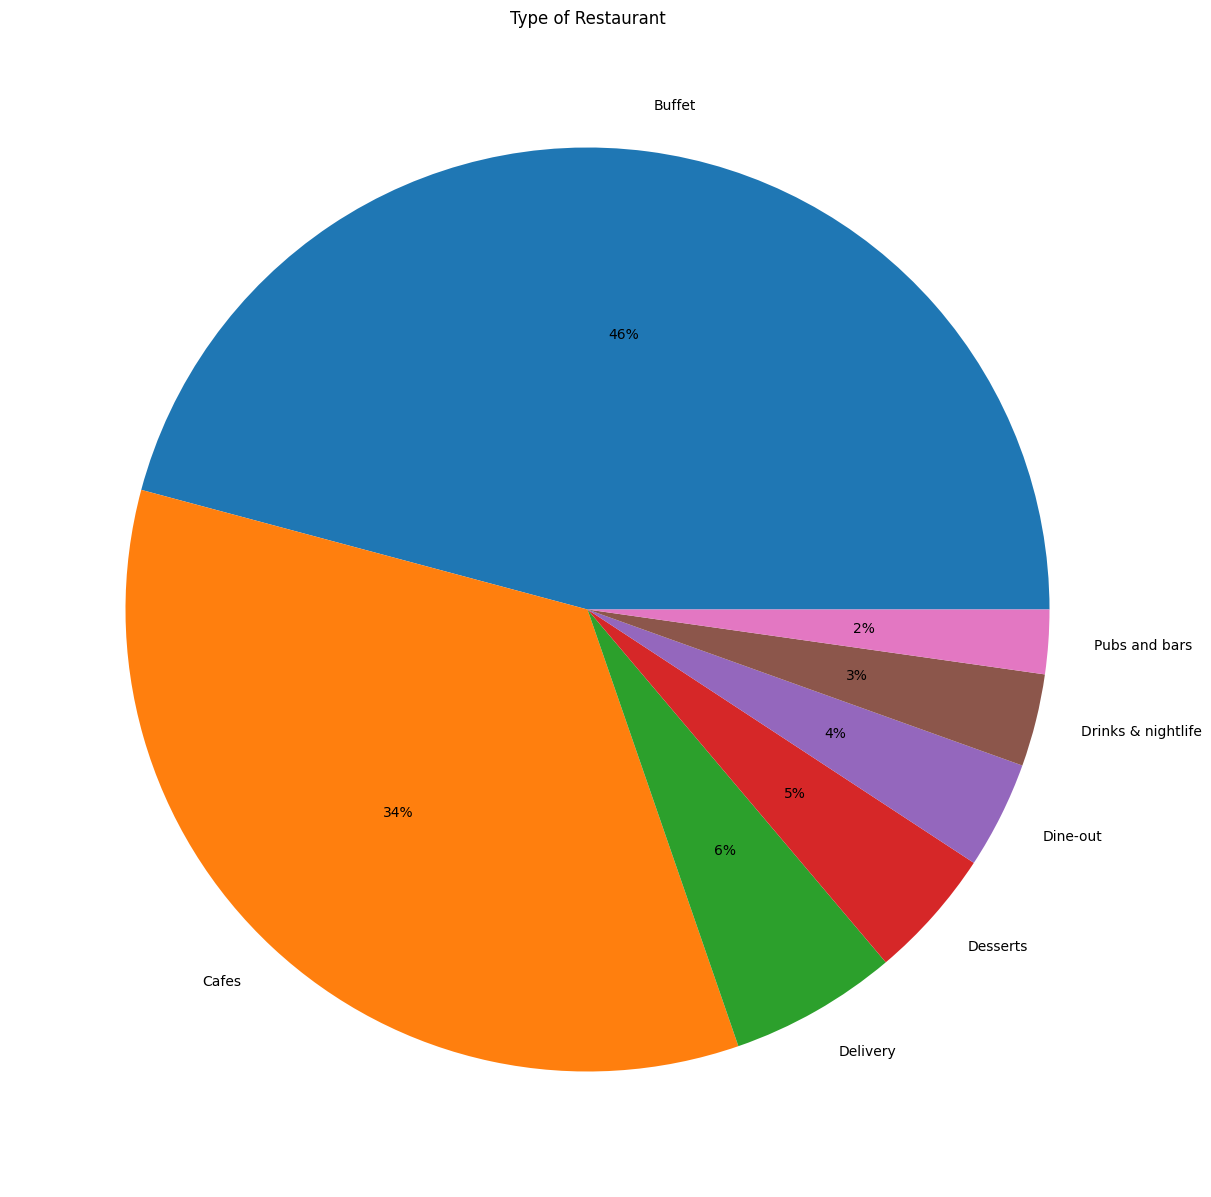

In [24]:
# list of differet services offered by the outlets 
plt.figure(figsize=(15,15))
food_type = zom_rest_df['type'].value_counts()
food_value = ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars']
plt.title('Type of Restaurant')
# plot pie chart for types of services offered by difernet outlets
fig = plt.pie(food_type,labels=food_value, autopct='%.0f%%')

In [25]:
# Convert 'cost' column to numeric
zom_rest_df['cost'] = pd.to_numeric(zom_rest_df['cost'], errors='coerce')
print('Maximum value: ',zom_rest_df['cost'].max())
print('Minimum value: ',zom_rest_df['cost'].min())
print('Average value: ',zom_rest_df['cost'].mean())


Maximum value:  950.0
Minimum value:  40.0
Average value:  510.15440666204023


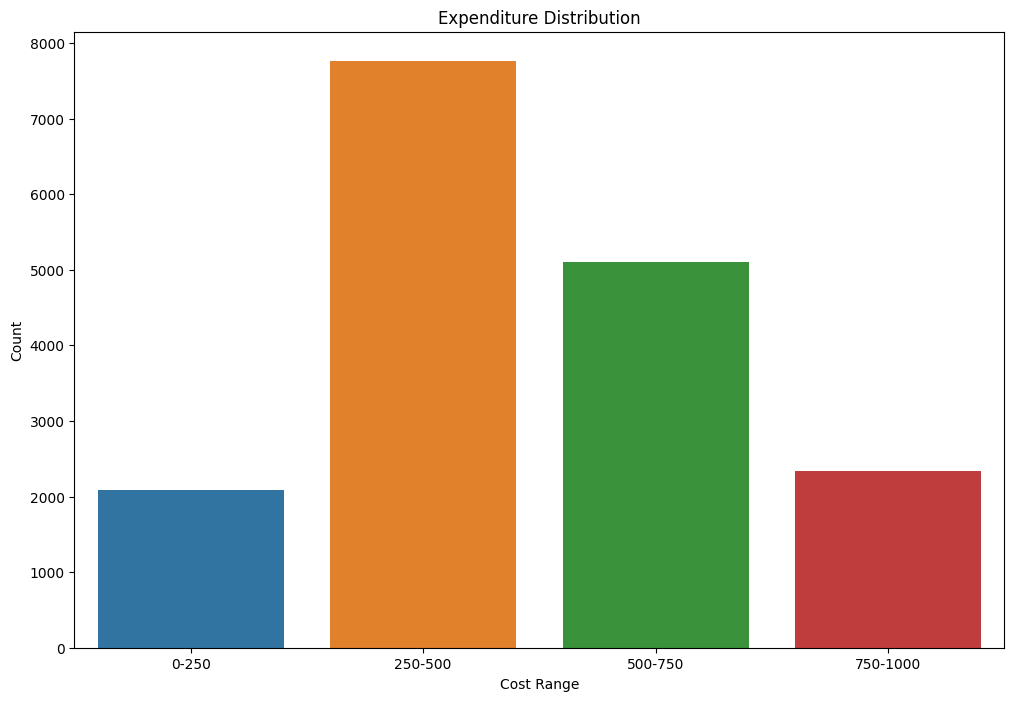

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cost ranges and corresponding labels
cost_ranges = ['0-250', '250-500', '500-750', '750-1000']

# Assign the cost ranges to each restaurant based on their cost values
zom_rest_df['cost_range'] = pd.cut(zom_rest_df['cost'], bins=[0, 250, 500, 750, 1000], labels=cost_ranges)

# Count the occurrences of each cost range
cost_diff = zom_rest_df['cost_range'].value_counts().reset_index()
cost_diff.columns = ['cost_range', 'count']

# Set up the plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.barplot(data=cost_diff, x='cost_range', y='count')

# Set the plot title and axis labels
plt.title('Expenditure Distribution')
plt.xlabel('Cost Range')
plt.ylabel('Count')

# Display the plot
plt.show()


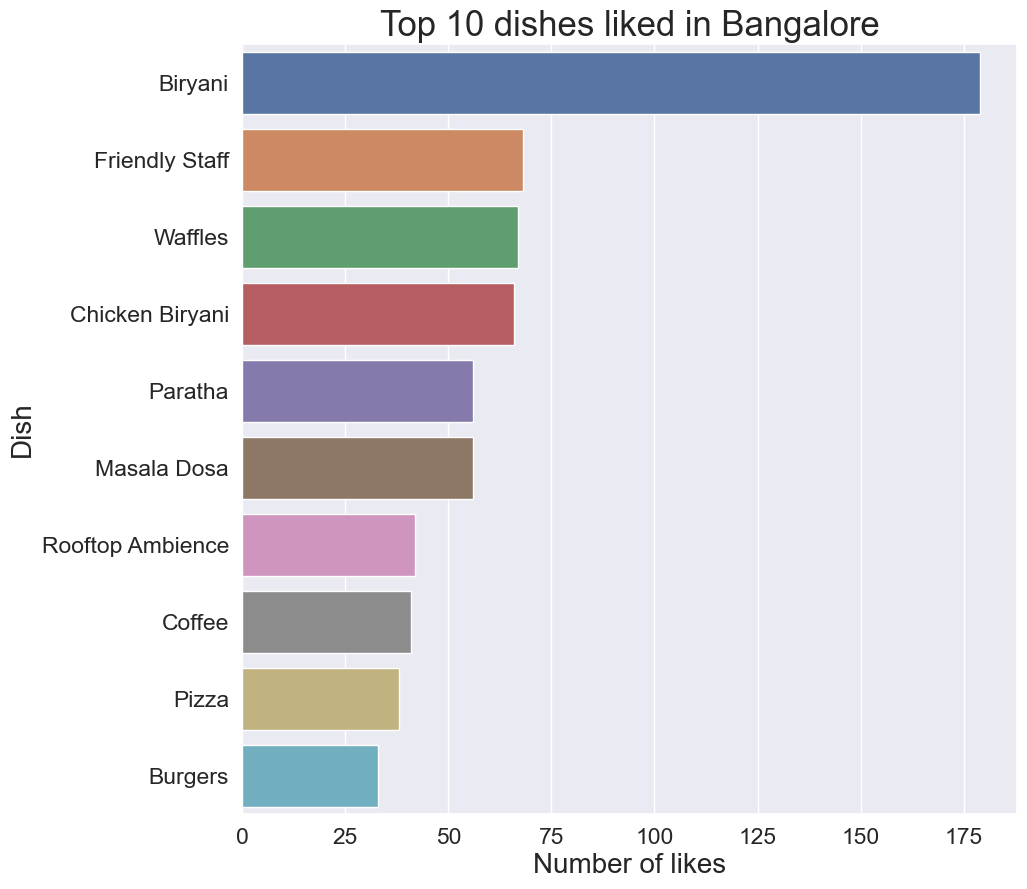

In [27]:
# Get the top 10 dishes liked in Bangalore
top_dishes = zom_rest_df['dish_liked'].value_counts()[:10]

# Create a countplot of the top dishes
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.countplot(y='dish_liked', data=zom_rest_df, order=top_dishes.index)

# Set the plot title and axis labels
plt.title('Top 10 dishes liked in Bangalore', fontsize=25)
plt.xlabel('Number of likes', fontsize=20)
plt.ylabel('Dish', fontsize=20)

# Show the plot
plt.show()

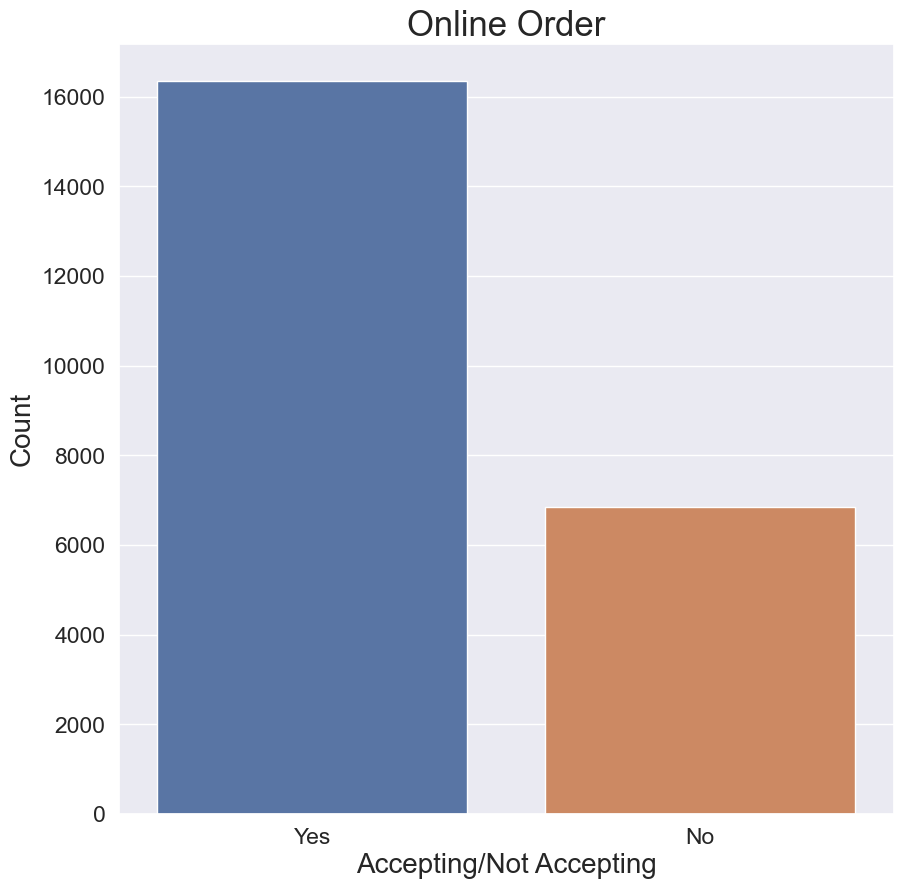

In [28]:
# get count of online order in Bangalore
online = zom_rest_df['online_order'].value_counts()

# Create a countplot of online order
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.countplot(x='online_order', data=zom_rest_df, order=online.index)

# Set the plot title and axis labels
plt.title('Online Order', fontsize=25)
plt.xlabel('Accepting/Not Accepting', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Show the plot
plt.show()

## DATA PREPROSSESSING


In [29]:
zom_rest_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city,cost_range
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,750-1000
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,750-1000
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,750-1000
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,250-500
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,500-750


In [30]:
zom_rest_df.shape

(23218, 13)

### DROPPING COLUMNS 

In [31]:
zom_transfrom = zom_rest_df.drop(columns=['name','dish_liked','cost_range','city','type'],axis=1)

In [32]:
zom_transfrom.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [33]:
zom_transfrom.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost'],
      dtype='object')

### SAVING ZOM_TRANSFROM IN CSV FORMAT FOR STREAMLIT

In [34]:
zom_transfrom.to_csv('zom_transfrom_before.csv',index=False)

In [35]:
zom_transfrom.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [36]:
zom_transfrom.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost'],
      dtype='object')

In [37]:
zom_transfrom.dropna(how='any',inplace=True)

In [38]:
zom_transfrom.isna().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
dtype: int64

In [39]:
zom_transfrom['cost'].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 750., 200.,
       850., 150., 350., 250., 100., 900., 950., 230., 180., 330.,  40.,
       120.])

### LABEL ENCODING

In [40]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

In [41]:
# features and target variable
features_labelencoding = zom_transfrom.drop('rate',axis=1)
target_encoding = zom_transfrom['rate'].values

In [42]:
# Apply label encoding to each feature column
columns_to_encode = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines']
# Apply label encoding to each feature column
for column in columns_to_encode:
    features_labelencoding[column] = LabelEncoder().fit_transform(features_labelencoding[column])


In [43]:
features_labelencoding.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,1,16,990,800.0
1,1,0,787,1,16,479,800.0
2,1,0,918,1,13,389,800.0
3,0,0,88,1,36,1141,300.0
4,0,0,166,4,16,1000,600.0


### MINMAX SCALER

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
Mm = MinMaxScaler()

In [45]:
# Apply MinMaxscaler to each feature column
features_labelencoding_minmax = Mm.fit_transform(features_labelencoding)

In [46]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_labelencoding_minmax, target_encoding, test_size=0.3, random_state=42)

### EXTRA TREES REGRESSOR

In [47]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import numpy as np


# Instantiate the ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features= 0.3, max_depth=None)

# Create the pipeline
pipeline = Pipeline([
    ('regressor', regressor)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Evaluate the predictions
print('R2 score:', r2_score(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2 score: 0.9321100838570051
MAE: 0.02727523868073099
RMSE: 0.1077779149166361


In [55]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(pipeline, features_labelencoding, target_encoding, cv=5,scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_score

# Print the cross-validation scores
print("Cross-validation MSE scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())

Cross-validation MSE scores: [0.02578757 0.03394026 0.0311286  0.00613695 0.04557192]
Mean MSE: 0.028513058561126958


In [48]:
import pandas as pd

sample = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': np.round(predictions, 2)})
sample.head()


,Actual Rating,Predicted Rating
0,3.3,3.30
1,3.4,3.28
2,3.9,3.91
3,3.8,3.80
4,3.3,3.30


### IMPORT PICKLE

In [49]:
import pickle

pickle.dump(pipeline,open('ExtraTreesRegressor.pkl','wb'))